# Data Description

The age of abalone is determined by cutting the shell through the cone, staining it, and counting the number of rings through a microscope -- a boring and time-consuming task. Other measurements, which are easier to obtain, are used to predict the age. Further information, such as weather patterns and location (hence food availability) may be required to solve the problem.



Our target column is the given dataset is 'rings'. Number of rings will define the age of abalone. So by predicting the rings of abalone we can predict the age of abalone

# Importing the Libraries

In [13]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

# Loading the Dataset

In [14]:
df=pd.read_csv('https://raw.githubusercontent.com/dsrscientist/dataset1/master/abalone.csv')
df.head()

,Sex,Length,Diameter,Height,Whole weight,Shucked weight,Viscera weight,Shell weight,Rings
0,M,0.455,0.365,0.095,0.5140,0.2245,0.1010,0.150,15
1,M,0.350,0.265,0.090,0.2255,0.0995,0.0485,0.070,7
2,F,0.530,0.420,0.135,0.6770,0.2565,0.1415,0.210,9
3,M,0.440,0.365,0.125,0.5160,0.2155,0.1140,0.155,10
4,I,0.330,0.255,0.080,0.2050,0.0895,0.0395,0.055,7


In [15]:
df.shape

(4177, 9)

In [16]:
df.columns

Index(['Sex', 'Length', 'Diameter', 'Height', 'Whole weight', 'Shucked weight',
       'Viscera weight', 'Shell weight', 'Rings'],
      dtype='object')

# Attribute information

Given is the attribute name, attribute type, the measurement unit and a brief description. The number of rings is the value to predict: either as a continuous value or as a classification problem.

Name/Datatype/Measurement Unit/Description

Sex / nominal / -- / M, F, and I (infant)

Length / continuous / mm / Longest shell measurement

Diameter / continuous / mm / perpendicular to length

Height / continuous / mm / with meat in shell

Whole weight / continuous / grams / whole abalone

Shucked weight / continuous / grams / weight of meat

Viscera weight / continuous / grams / gut weight (after bleeding)

Shell weight / continuous / grams / after being dried

Rings / integer / -- / +1.5 gives the age in years



In [17]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4177 entries, 0 to 4176
Data columns (total 9 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Sex             4177 non-null   object 
 1   Length          4177 non-null   float64
 2   Diameter        4177 non-null   float64
 3   Height          4177 non-null   float64
 4   Whole weight    4177 non-null   float64
 5   Shucked weight  4177 non-null   float64
 6   Viscera weight  4177 non-null   float64
 7   Shell weight    4177 non-null   float64
 8   Rings           4177 non-null   int64  
dtypes: float64(7), int64(1), object(1)
memory usage: 293.8+ KB


# Checking null values

In [18]:
df.isnull().sum()

Sex               0
Length            0
Diameter          0
Height            0
Whole weight      0
Shucked weight    0
Viscera weight    0
Shell weight      0
Rings             0
dtype: int64

<AxesSubplot:>

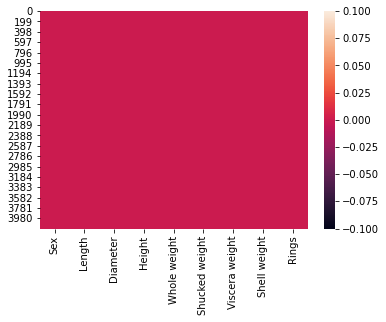

In [19]:
sns.heatmap(df.isnull())

Plotting the value through heatmap as well

plotting the coutplot of target column to the imbalancing of the dataset

<AxesSubplot:xlabel='Rings', ylabel='count'>

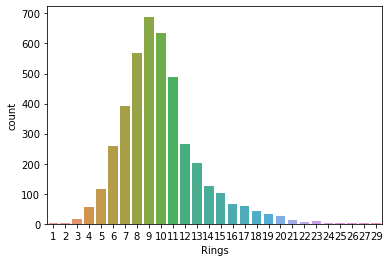

In [20]:
sns.countplot(df['Rings'])

In [21]:
df['Rings'].value_counts()

9     689
10    634
8     568
11    487
7     391
12    267
6     259
13    203
14    126
5     115
15    103
16     67
17     58
4      57
18     42
19     32
20     26
3      15
21     14
23      9
22      6
27      2
24      2
26      1
29      1
25      1
1       1
2       1
Name: Rings, dtype: int64

From the above plot and numbers we get to know that the data is very imbalance and we need to balance it.

# Label Encoding of Sex column

In [22]:
from sklearn import preprocessing
le=preprocessing.LabelEncoder()

df['Sex']=le.fit_transform(df['Sex'].astype(str))
df.head()

,Sex,Length,Diameter,Height,Whole weight,Shucked weight,Viscera weight,Shell weight,Rings
0,2,0.455,0.365,0.095,0.5140,0.2245,0.1010,0.150,15
1,2,0.350,0.265,0.090,0.2255,0.0995,0.0485,0.070,7
2,0,0.530,0.420,0.135,0.6770,0.2565,0.1415,0.210,9
3,2,0.440,0.365,0.125,0.5160,0.2155,0.1140,0.155,10
4,1,0.330,0.255,0.080,0.2050,0.0895,0.0395,0.055,7


In [23]:
#checking the datatype again
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4177 entries, 0 to 4176
Data columns (total 9 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Sex             4177 non-null   int32  
 1   Length          4177 non-null   float64
 2   Diameter        4177 non-null   float64
 3   Height          4177 non-null   float64
 4   Whole weight    4177 non-null   float64
 5   Shucked weight  4177 non-null   float64
 6   Viscera weight  4177 non-null   float64
 7   Shell weight    4177 non-null   float64
 8   Rings           4177 non-null   int64  
dtypes: float64(7), int32(1), int64(1)
memory usage: 277.5 KB


In [24]:
#separating the dependent and independent variable for balancing the class
x=df.iloc[:,:-1]
y=df.iloc[:,-1]

In [25]:
y.head()

0    15
1     7
2     9
3    10
4     7
Name: Rings, dtype: int64

In [26]:
x.shape

(4177, 8)

# Random over sampling

In [27]:
from imblearn.over_sampling import RandomOverSampler
ros=RandomOverSampler(random_state=0)
x_fit,y_fit=ros.fit_resample(x,y)

# SMOTE to balance the data

In [28]:
from imblearn.over_sampling import SMOTE
smt= SMOTE(random_state=0,k_neighbors=1)
train_x,train_y=smt.fit_resample(x_fit,y_fit)
train_y.value_counts()

16    689
1     689
14    689
29    689
13    689
12    689
27    689
11    689
26    689
10    689
25    689
9     689
24    689
8     689
23    689
7     689
22    689
6     689
21    689
5     689
20    689
4     689
19    689
3     689
18    689
2     689
17    689
15    689
Name: Rings, dtype: int64

In [29]:
train_x

,Sex,Length,Diameter,Height,Whole weight,Shucked weight,Viscera weight,Shell weight
0,2,0.455,0.365,0.095,0.5140,0.2245,0.1010,0.150
1,2,0.350,0.265,0.090,0.2255,0.0995,0.0485,0.070
2,0,0.530,0.420,0.135,0.6770,0.2565,0.1415,0.210
3,2,0.440,0.365,0.125,0.5160,0.2155,0.1140,0.155
4,1,0.330,0.255,0.080,0.2050,0.0895,0.0395,0.055
...,...,...,...,...,...,...,...,...
19287,0,0.700,0.585,0.185,1.8075,0.7055,0.3215,0.475
19288,0,0.700,0.585,0.185,1.8075,0.7055,0.3215,0.475
19289,0,0.700,0.585,0.185,1.8075,0.7055,0.3215,0.475
19290,0,0.700,0.585,0.185,1.8075,0.7055,0.3215,0.475


<AxesSubplot:xlabel='Rings', ylabel='count'>

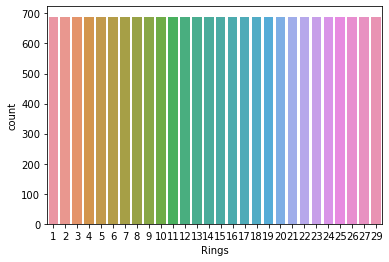

In [30]:
sns.countplot(train_y)

Now the data is balanced and we can go ahead with the further EDA & Machine learning algorithms

In [31]:
# putting the balanced dataset into a dataframe

df_new=pd.DataFrame(data=train_x)
df_new['Rings']=train_y
df=df_new
df

,Sex,Length,Diameter,Height,Whole weight,Shucked weight,Viscera weight,Shell weight,Rings
0,2,0.455,0.365,0.095,0.5140,0.2245,0.1010,0.150,15
1,2,0.350,0.265,0.090,0.2255,0.0995,0.0485,0.070,7
2,0,0.530,0.420,0.135,0.6770,0.2565,0.1415,0.210,9
3,2,0.440,0.365,0.125,0.5160,0.2155,0.1140,0.155,10
4,1,0.330,0.255,0.080,0.2050,0.0895,0.0395,0.055,7
...,...,...,...,...,...,...,...,...,...
19287,0,0.700,0.585,0.185,1.8075,0.7055,0.3215,0.475,29
19288,0,0.700,0.585,0.185,1.8075,0.7055,0.3215,0.475,29
19289,0,0.700,0.585,0.185,1.8075,0.7055,0.3215,0.475,29
19290,0,0.700,0.585,0.185,1.8075,0.7055,0.3215,0.475,29


# Statistical Summary

In [32]:
df.describe()

,Sex,Length,Diameter,Height,Whole weight,Shucked weight,Viscera weight,Shell weight,Rings
count,19292.000000,19292.000000,19292.000000,19292.000000,19292.000000,19292.000000,19292.000000,19292.000000,19292.000000
mean,0.979422,0.509530,0.400426,0.143627,0.935077,0.353575,0.187395,0.300284,14.535714
std,0.844158,0.180447,0.149262,0.060282,0.628354,0.240986,0.125586,0.211085,8.139543
min,0.000000,0.075000,0.055000,0.000000,0.002000,0.001000,0.000500,0.001500,1.000000
25%,0.000000,0.435000,0.335000,0.110000,0.389375,0.158000,0.081500,0.117500,7.750000
50%,1.000000,0.565000,0.450000,0.160000,0.978250,0.367000,0.190000,0.300000,14.500000
75%,2.000000,0.645000,0.505000,0.185000,1.406000,0.519500,0.284000,0.460000,21.250000
max,2.000000,0.815000,0.650000,1.130000,2.825500,1.488000,0.760000,1.005000,29.000000


Observations

1. Skewness present in the dataset.
2. Outliers present in the dataset.
3. Sex column doesn't have 25% value as the data is in categorical terms.


# Checking the correlation

In [33]:
corr=df.corr()
corr

,Sex,Length,Diameter,Height,Whole weight,Shucked weight,Viscera weight,Shell weight,Rings
Sex,1.000000,-0.080689,-0.078075,-0.080531,-0.095408,-0.056637,-0.069259,-0.076418,-0.119980
Length,-0.080689,1.000000,0.993447,0.939194,0.909143,0.890663,0.896331,0.859482,0.777002
Diameter,-0.078075,0.993447,1.000000,0.940052,0.914541,0.895047,0.899168,0.863981,0.793831
Height,-0.080531,0.939194,0.940052,1.000000,0.884405,0.831286,0.849471,0.874358,0.817103
Whole weight,-0.095408,0.909143,0.914541,0.884405,1.000000,0.963152,0.961896,0.956332,0.762762
Shucked weight,-0.056637,0.890663,0.895047,0.831286,0.963152,1.000000,0.949646,0.870751,0.641690
Viscera weight,-0.069259,0.896331,0.899168,0.849471,0.961896,0.949646,1.000000,0.887015,0.671360
Shell weight,-0.076418,0.859482,0.863981,0.874358,0.956332,0.870751,0.887015,1.000000,0.800244
Rings,-0.119980,0.777002,0.793831,0.817103,0.762762,0.641690,0.671360,0.800244,1.000000


Sex column has negative correlation with every column

<AxesSubplot:>

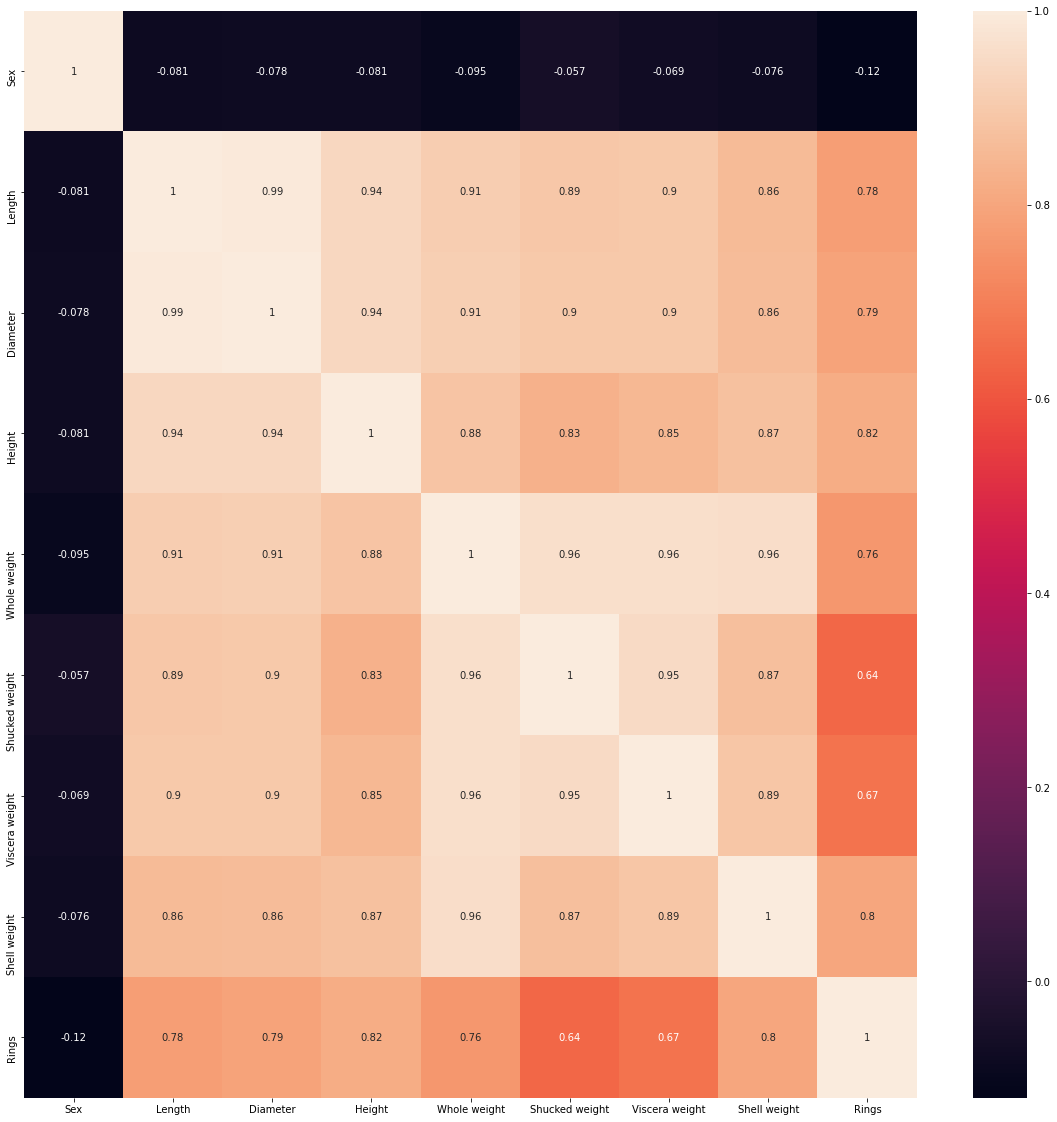

In [34]:
plt.figure(figsize=(20,20))
sns.heatmap(corr,annot=True)

In [35]:
#sorting the correlation value of target column

corr['Rings'].sort_values()

Sex              -0.119980
Shucked weight    0.641690
Viscera weight    0.671360
Whole weight      0.762762
Length            0.777002
Diameter          0.793831
Shell weight      0.800244
Height            0.817103
Rings             1.000000
Name: Rings, dtype: float64

# Data Visualization

<AxesSubplot:xlabel='Sex', ylabel='count'>

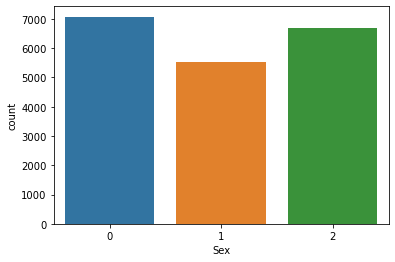

In [36]:
sns.countplot(df['Sex'])

countplot of sex column

<AxesSubplot:xlabel='Rings', ylabel='Length'>

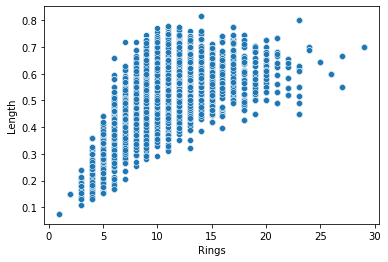

In [37]:
sns.scatterplot(df['Rings'],df['Length'])

The data is linearly divided

array([[<AxesSubplot:ylabel='Density'>, <AxesSubplot:ylabel='Density'>,
        <AxesSubplot:ylabel='Density'>],
       [<AxesSubplot:ylabel='Density'>, <AxesSubplot:ylabel='Density'>,
        <AxesSubplot:ylabel='Density'>],
       [<AxesSubplot:ylabel='Density'>, <AxesSubplot:ylabel='Density'>,
        <AxesSubplot:ylabel='Density'>]], dtype=object)

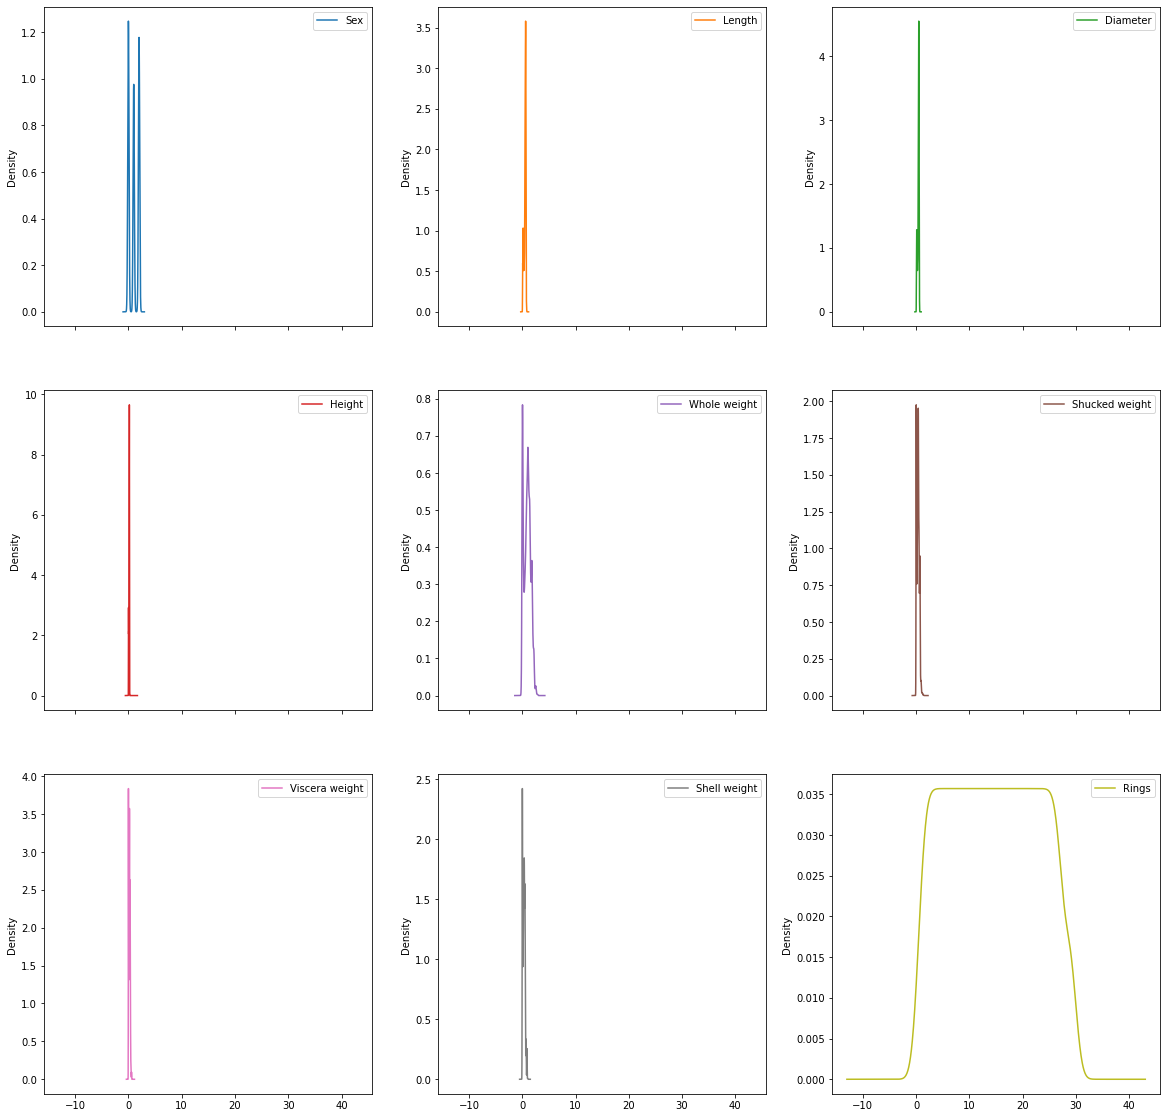

In [38]:
df.plot(kind='kde',subplots=True,layout=(3,3),figsize=(20,20))

Plotting the kde we get to know that many columns have multimodality and ring column is normalized

<AxesSubplot:xlabel='Length', ylabel='Density'>

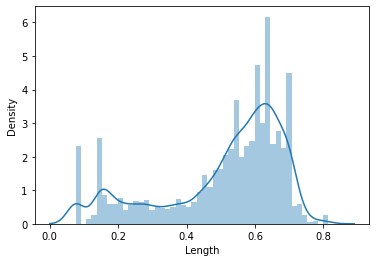

In [39]:
sns.distplot(df['Length'])

Length column is little bit right skewed

<AxesSubplot:xlabel='Shell weight', ylabel='Density'>

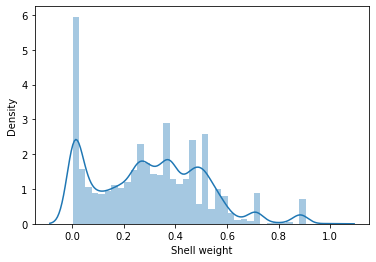

In [40]:
sns.distplot(df['Shell weight'])

shell weight column has multimodality

<AxesSubplot:xlabel='Diameter', ylabel='Density'>

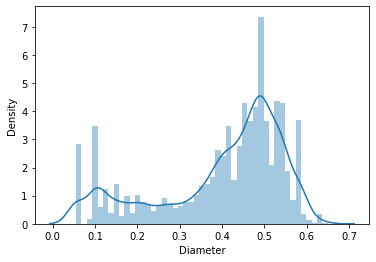

In [41]:
sns.distplot(df['Diameter'])

Diameter column also has little skewness

<AxesSubplot:xlabel='Height', ylabel='Density'>

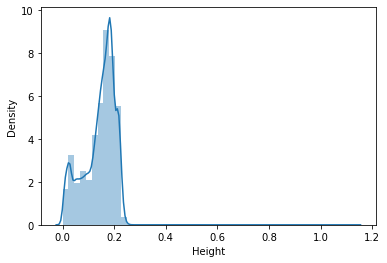

In [42]:
sns.distplot(df['Height'])

Height column shows left skewness and also bimodality

<AxesSubplot:xlabel='Shucked weight', ylabel='Density'>

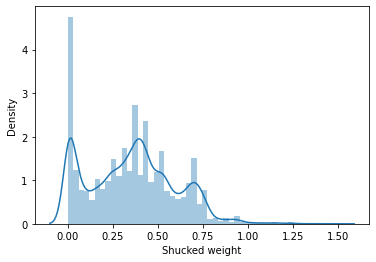

In [43]:
sns.distplot(df['Shucked weight'])

This column of dataset also has multimodality

<AxesSubplot:xlabel='Whole weight', ylabel='Density'>

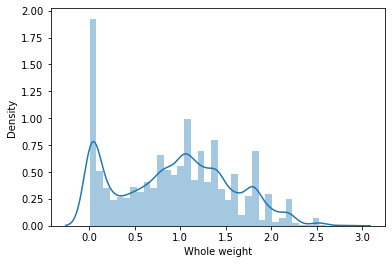

In [44]:
sns.distplot(df['Whole weight'])

Whole weight also shown up with multimodality

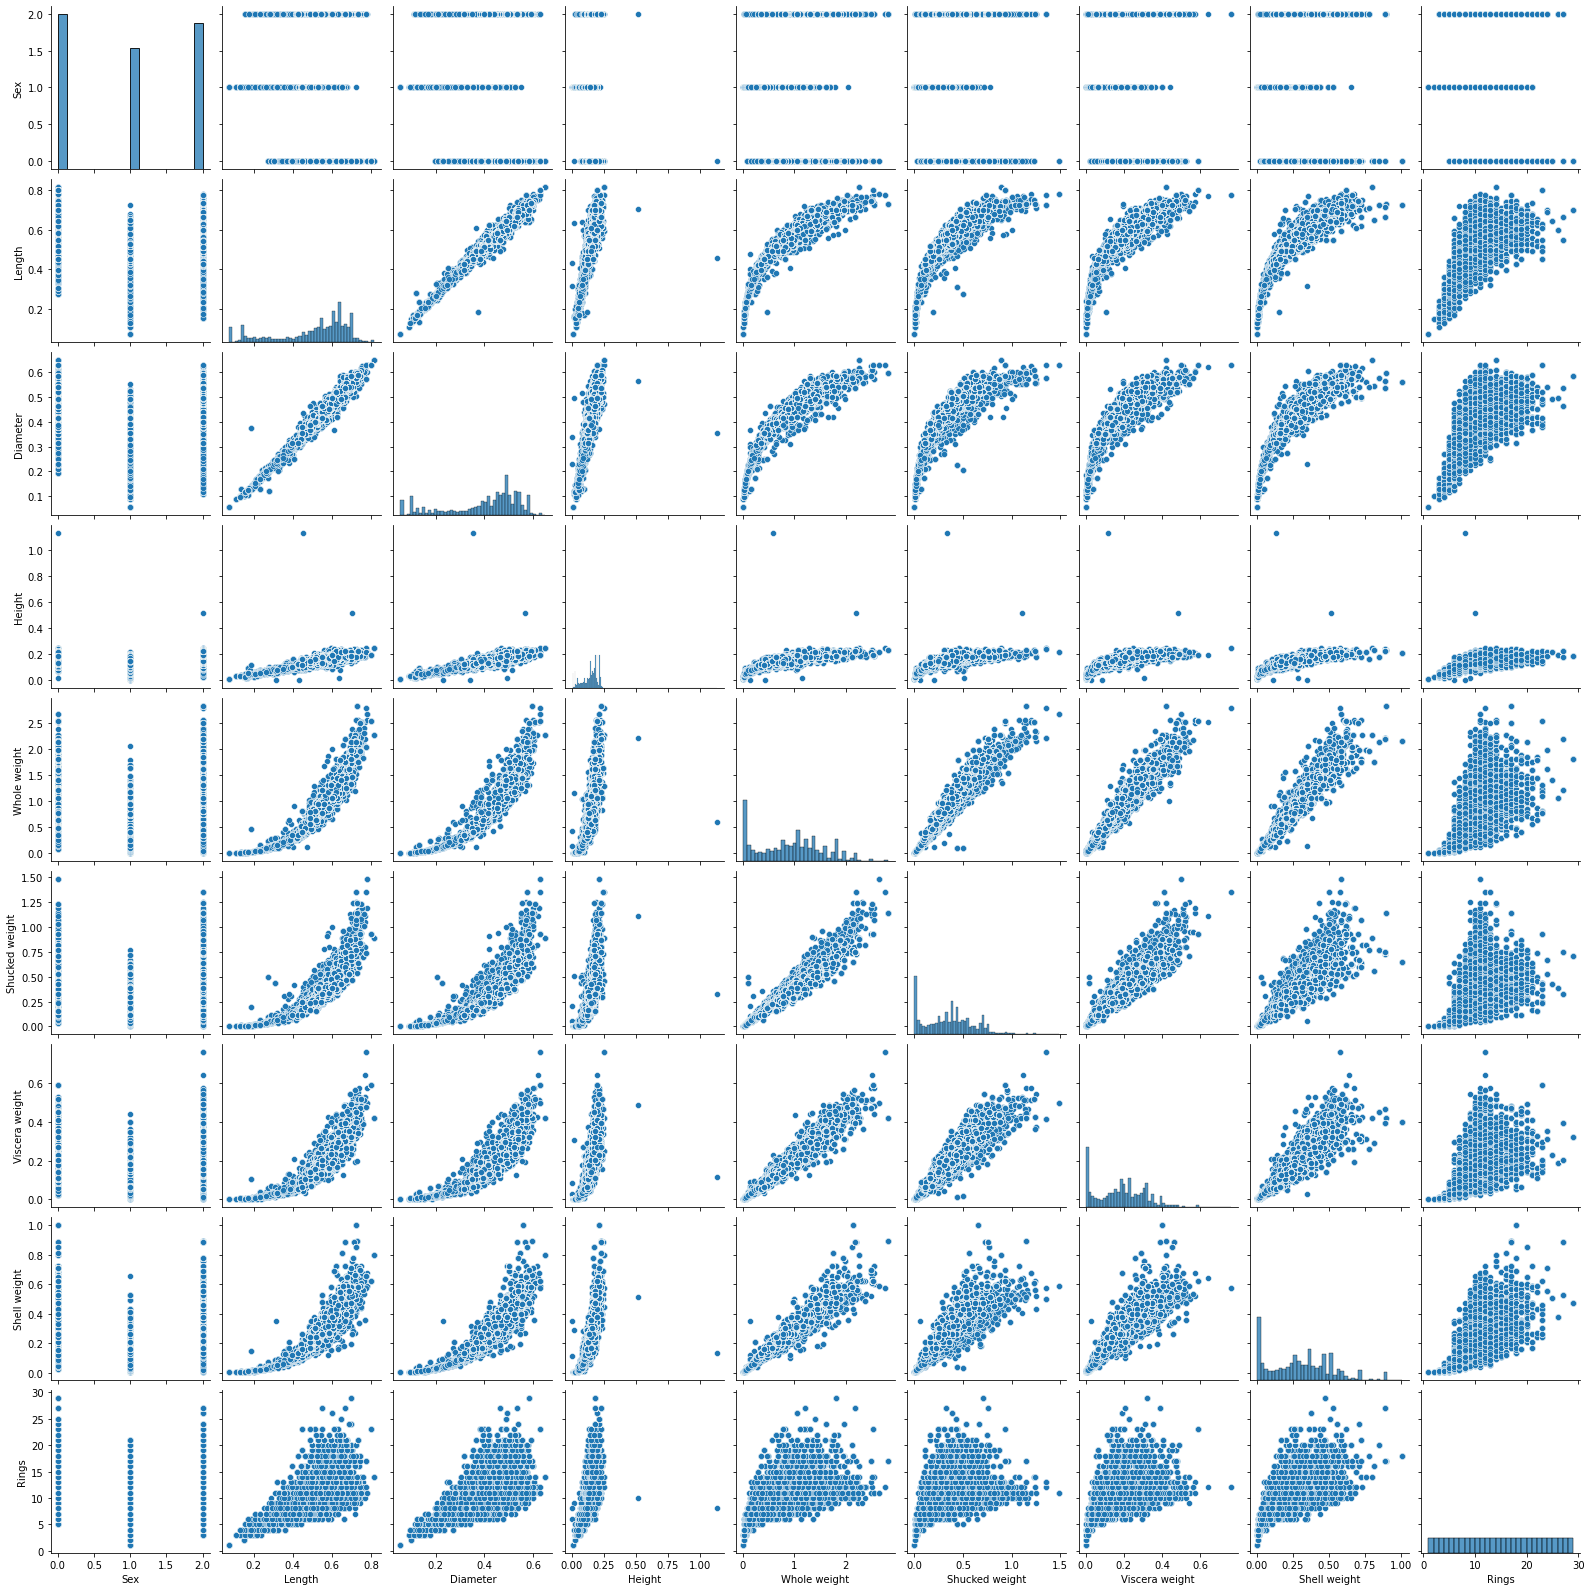

In [45]:
#pairplot graph

sns.pairplot(df)

<AxesSubplot:xlabel='Shell weight', ylabel='Count'>

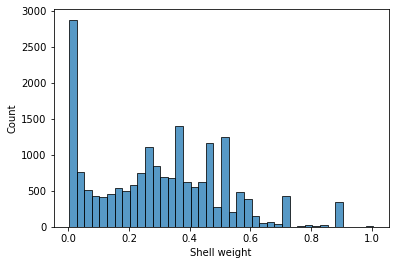

In [46]:
sns.histplot(df['Shell weight'])

Data is more dense in left side

<AxesSubplot:xlabel='Diameter', ylabel='Count'>

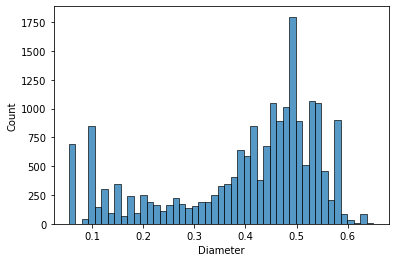

In [47]:
sns.histplot(df['Diameter'])

The data is likely distributed but has more data on the right side

<AxesSubplot:xlabel='Height', ylabel='Count'>

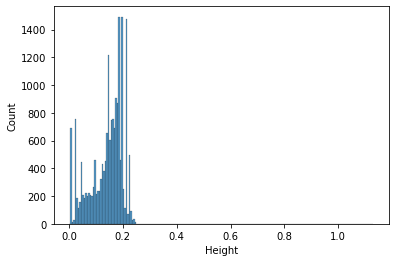

In [48]:
sns.histplot(df['Height'])

The whole data is shrinked to the left side

<AxesSubplot:xlabel='Length', ylabel='Count'>

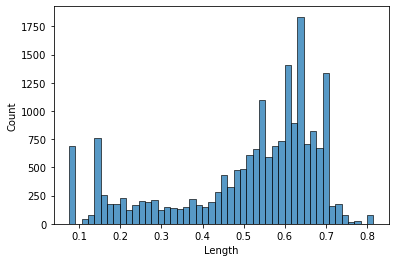

In [49]:
sns.histplot(df['Length'])

Likely distributed data

<AxesSubplot:xlabel='Shucked weight', ylabel='Count'>

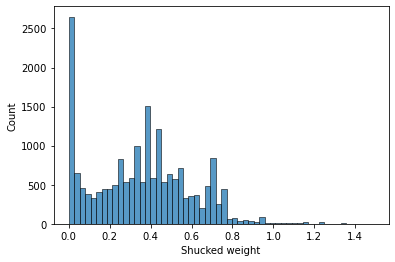

In [50]:
sns.histplot(df['Shucked weight'])

Dense to the left side or lower values

<AxesSubplot:xlabel='Viscera weight', ylabel='Count'>

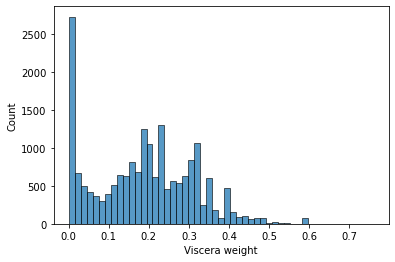

In [51]:
sns.histplot(df['Viscera weight'])

Many of the data is on the lower side

<AxesSubplot:xlabel='Whole weight', ylabel='Count'>

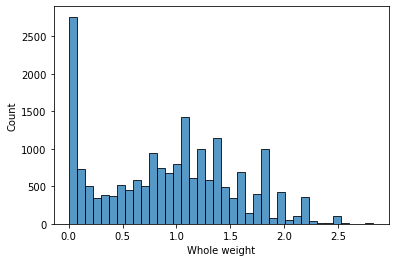

In [52]:
sns.histplot(df['Whole weight'])

Likely distributed data

# Checking Outliers

Sex                  AxesSubplot(0.125,0.749828;0.352273x0.130172)
Length            AxesSubplot(0.547727,0.749828;0.352273x0.130172)
Diameter             AxesSubplot(0.125,0.593621;0.352273x0.130172)
Height            AxesSubplot(0.547727,0.593621;0.352273x0.130172)
Whole weight         AxesSubplot(0.125,0.437414;0.352273x0.130172)
Shucked weight    AxesSubplot(0.547727,0.437414;0.352273x0.130172)
Viscera weight       AxesSubplot(0.125,0.281207;0.352273x0.130172)
Shell weight      AxesSubplot(0.547727,0.281207;0.352273x0.130172)
Rings                   AxesSubplot(0.125,0.125;0.352273x0.130172)
dtype: object

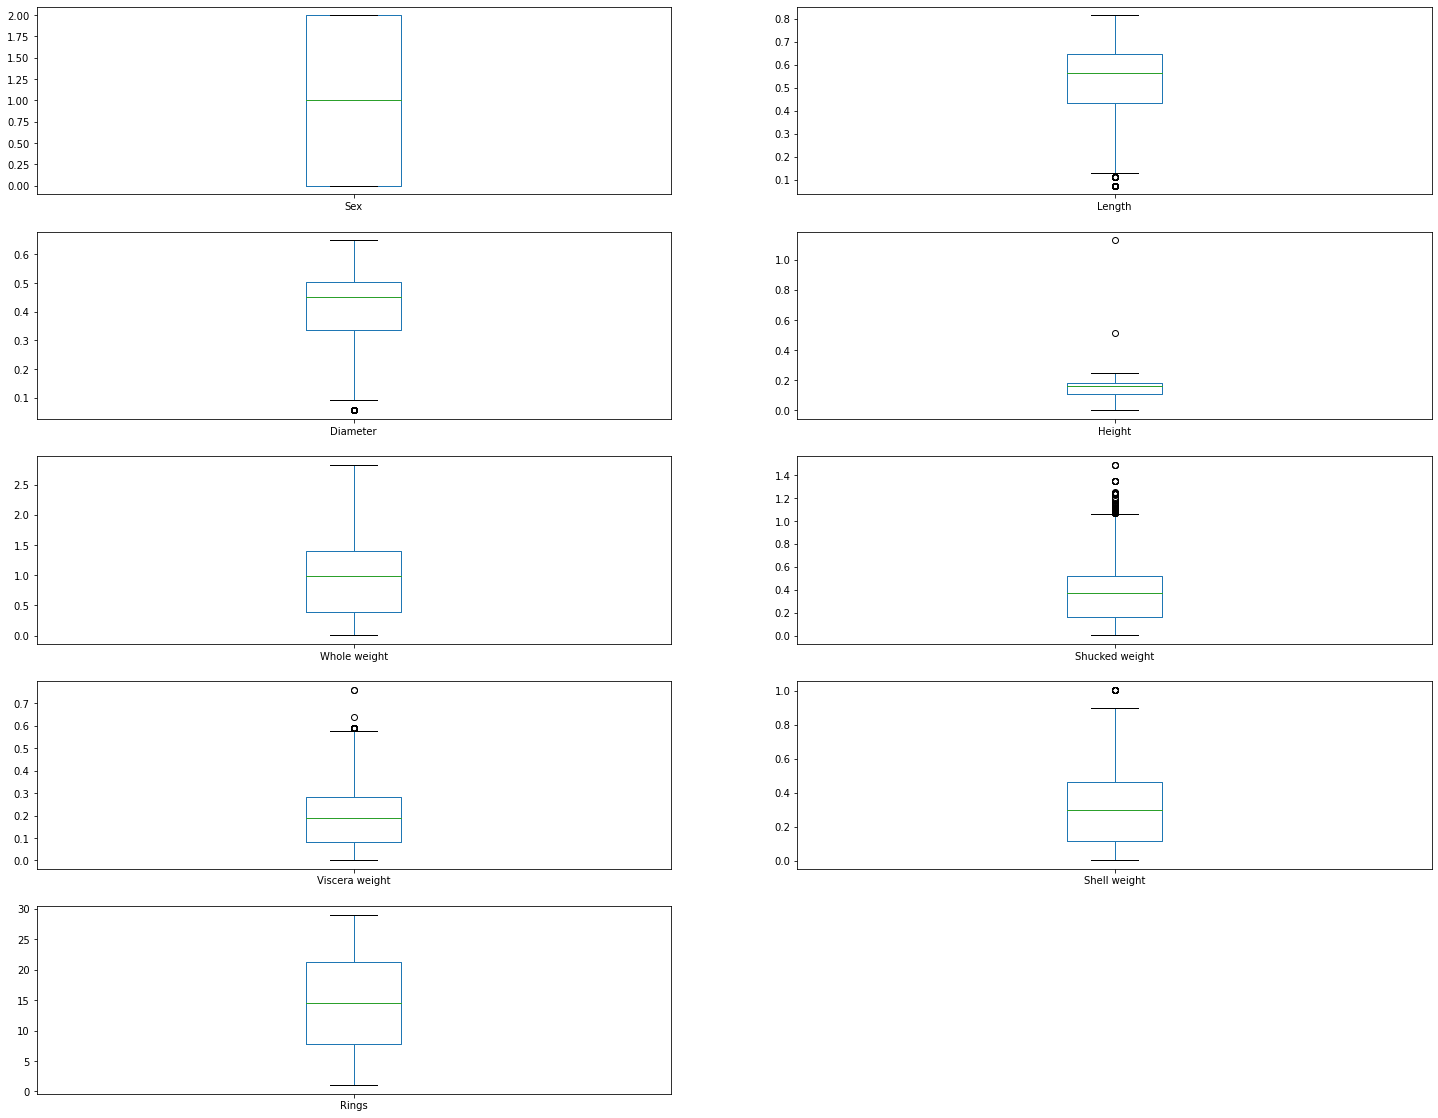

In [53]:
df.plot(kind='box',subplots=True,layout=(5,2),figsize=(25,20))

Outliers present in the dataset

In [54]:
x=df.iloc[:,:-1]
y=df.iloc[:,-1]

# Checking skewness

In [55]:
df.skew()

Sex               0.038940
Length           -1.019465
Diameter         -0.954448
Height           -0.516084
Whole weight      0.119710
Shucked weight    0.297206
Viscera weight    0.200879
Shell weight      0.363270
Rings             0.025800
dtype: float64

In [56]:
#removing the skewness

from sklearn.preprocessing import power_transform
x_new=power_transform(x)
x=pd.DataFrame(x_new,columns=x.columns)
x.skew()

Sex              -0.111170
Length           -0.279590
Diameter         -0.254084
Height            0.468827
Whole weight     -0.076013
Shucked weight   -0.006897
Viscera weight   -0.000628
Shell weight      0.004462
dtype: float64

In [57]:
#removing the outliers from the data

from scipy.stats import zscore
z=np.abs(zscore(df))
threshold=3
print(np.where(z>3))
df_new=df[(z<3).all(axis=1)]
df=df_new
df.shape

(array([  163,   891,   891,  1051,  1193,  1206,  1207,  1209,  1417,
        1417,  1426,  1427,  1528,  1754,  1761,  1762,  1762,  1763,
        1763,  1982,  2051,  2334,  2624,  2810,  2811,  2862,  2863,
        3007,  3427,  3427,  3599,  3713,  3715,  3715,  3961,  8381,
        8431,  8437,  8468,  8516,  8529,  8531,  8533,  8579,  8581,
        8623,  8742,  8902,  8902,  8943,  8962,  9223,  9322,  9423,
        9450,  9491,  9641,  9683,  9706,  9747,  9762,  9765,  9775,
        9817,  9825,  9847, 10009, 11246, 11246, 11293, 11293, 11318,
       11318, 11320, 11320, 11339, 11339, 11360, 11360, 11408, 11408,
       11438, 11438, 11483, 11483, 11558, 11558, 11580, 11580, 11644,
       11644, 11855, 11912, 12004, 12054, 12108, 12142, 12157, 12411,
       12440, 12468, 12476, 15176, 15196, 15200, 15201, 15203, 15209,
       15212, 15227, 15235, 15252, 15259, 15265, 15276, 15281, 15288,
       15292, 15297, 15346, 15349, 15352, 15368, 15373, 15376, 15377,
       15396, 15397

(19133, 9)

In [58]:
#scaling the data

from sklearn.preprocessing import StandardScaler
sc=StandardScaler()
x=sc.fit_transform(x)
x


array([[ 1.15309269, -0.59892639, -0.51487052, ..., -0.4822945 ,
        -0.66218773, -0.67428699],
       [ 1.15309269, -1.09712934, -1.09348314, ..., -1.07283917,
        -1.12320455, -1.12706207],
       [-1.2057289 , -0.13374005, -0.10083884, ..., -0.33941138,
        -0.32099675, -0.35695097],
       ...,
       [-1.2057289 ,  1.35847464,  1.68076952, ...,  1.39483924,
         1.06483836,  0.8628913 ],
       [-1.2057289 ,  1.35847464,  1.68076952, ...,  1.39483924,
         1.06483836,  0.8628913 ],
       [-1.2057289 ,  1.35847464,  1.68076952, ...,  1.39483924,
         1.06483836,  0.8628913 ]])

# Importing the different models and libraries

In [59]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error,mean_absolute_error
from sklearn.model_selection import train_test_split
from sklearn.linear_model import Lasso
from sklearn.svm import SVR
from sklearn.tree import DecisionTreeRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import r2_score
from sklearn.ensemble import RandomForestRegressor 

In [60]:
# defining the different models

lg=LinearRegression()
svr=SVR()
dtr=DecisionTreeRegressor()
knr=KNeighborsRegressor()
rdr=RandomForestRegressor()

# Finding the best random state

In [61]:
model=[lg,rdr,svr,dtr,knr]
maxAcc=0
maxRS=0
for i in range(30,70):
    x_train,x_test,y_train,y_test=train_test_split(x,y,random_state=i,test_size=.20)
    lg.fit(x_train,y_train)
    pred=lg.predict(x_test,)
    acc=r2_score(y_test,pred)
    if acc>maxAcc:
        maxAcc=acc
        maxRS=i
print('Best Accuracy score is', maxAcc , 'on random state', maxRS)

Best Accuracy score is 0.8327041282566812 on random state 44


x_train,x_test,y_train,y_test=train_test_split(x,y,random_state=44,test_size=.20)


# Linear Regression

In [62]:
lg.fit(x_train,y_train)
pred1=lg.predict(x_test)
acc=r2_score(y_test,pred1)
print('Accuracy Score: ',acc)

Accuracy Score:  0.8151238216498441


# Decision Tree Regression

In [63]:
dtr.fit(x_train,y_train)
pred2=dtr.predict(x_test)
acc=r2_score(y_test,pred2)
print('Accuracy Score: ',acc)

Accuracy Score:  0.981769790399399


# Support vector regressor

In [64]:
svr.fit(x_train,y_train)
pred3=svr.predict(x_test)
acc=r2_score(y_test,pred3)
print('Accuracy Score: ',acc)

Accuracy Score:  0.8712748168787476


# Lasso regularization

In [65]:
ls=Lasso()
knr.fit(x_train,y_train)
pred4=knr.predict(x_test)
acc=r2_score(y_test,pred4)
print('Accuracy Score: ',acc)

Accuracy Score:  0.9741131023671467


# KNeighbor regeressor


In [66]:
knr.fit(x_train,y_train)
pred5=knr.predict(x_test)
acc=r2_score(y_test,pred5)
print('Accuracy Score: ',acc)

Accuracy Score:  0.9741131023671467


# Checking the cross val score

In [67]:
from sklearn.model_selection import cross_val_score
for i in range(2,8):
    cr=cross_val_score(dtr,x,y,cv=i)
    cr_mean=cr.mean()
    print("at cv= ", i)
    print('cross val score = ',cr_mean*100)

at cv=  2
cross val score =  -88.43855203984086
at cv=  3
cross val score =  89.99671259421653
at cv=  4
cross val score =  91.13869340315817
at cv=  5
cross val score =  85.62383440765228
at cv=  6
cross val score =  90.31531615319307
at cv=  7
cross val score =  91.63206865191843


at cv=7 we are getting the best accuracy

In [68]:
# cross val score for another model but not getting the good results

for i in range(2,8):
    cr=cross_val_score(knr,x,y,cv=i)
    cr_mean=cr.mean()
    print("at cv= ", i)
    print('cross val score = ',cr_mean*100)


at cv=  2
cross val score =  -263.1826578663321
at cv=  3
cross val score =  -237.76093739635732
at cv=  4
cross val score =  -489.8022476747948
at cv=  5
cross val score =  -677.9571096759713
at cv=  6
cross val score =  -962.5393945329693
at cv=  7
cross val score =  -1373.6799779496896


# Hypermeter Tuning

In [70]:
from sklearn.model_selection import GridSearchCV
# creating parameters
para={'max_features':['auto','sqrt','log2'],
      'max_depth':[4,5,6,7,8],
      'criterion':['squared_error', 'friedman_mse', 'absolute_error', 'poisson']}

GCV=GridSearchCV(dtr,para,cv=7,scoring='accuracy')
GCV.fit(x_train,y_train)
GCV.best_params_

{'criterion': 'absolute_error', 'max_depth': 4, 'max_features': 'sqrt'}

# Grid CV Score

In [71]:

GCV_pred=GCV.best_estimator_.predict(x_test)
r2_score(y_test,GCV_pred)


0.767814502202085

# Saving The model

In [72]:
import pickle
filename='Abalone_.pkl'
pickle.dump(lg, open(filename,'wb'))


# Conclusion

In [73]:
import numpy as np
a=np.array(y_test)
pred=np.array(lg.predict(x_test))
age=pd.DataFrame({'Actual':a,'Predicted':pred})
age

,Actual,Predicted
0,26,21.874741
1,7,6.718787
2,2,3.106459
3,16,9.958668
4,19,19.562715
...,...,...
3854,10,8.747518
3855,12,10.437180
3856,8,10.665977
3857,4,4.789149
